In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
df = pd.read_csv('cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose() # row becomes column and column becomes row

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

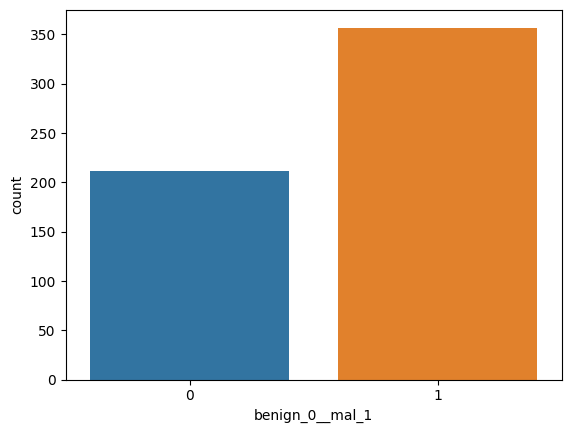

In [6]:
# is it well balanced
sns.countplot(x='benign_0__mal_1', data=df)

In [7]:
# df.corr()
# however i just want to see the corr between the column 'benign_0__mal_1' and all features
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

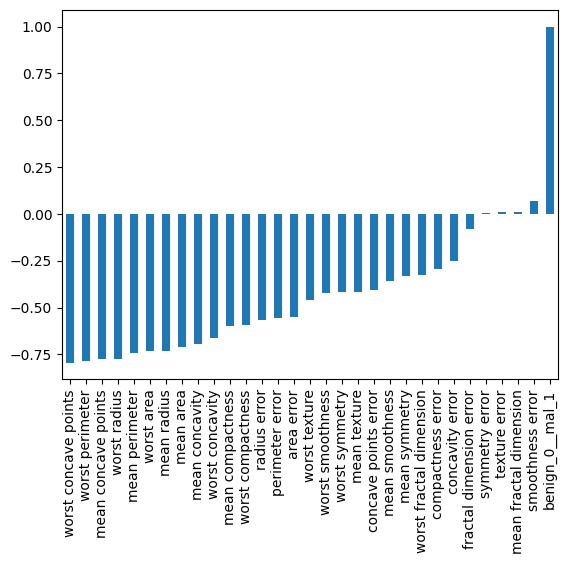

In [9]:
# using dataframe you can plot graph (no need to use matplotlib / seaborn)
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

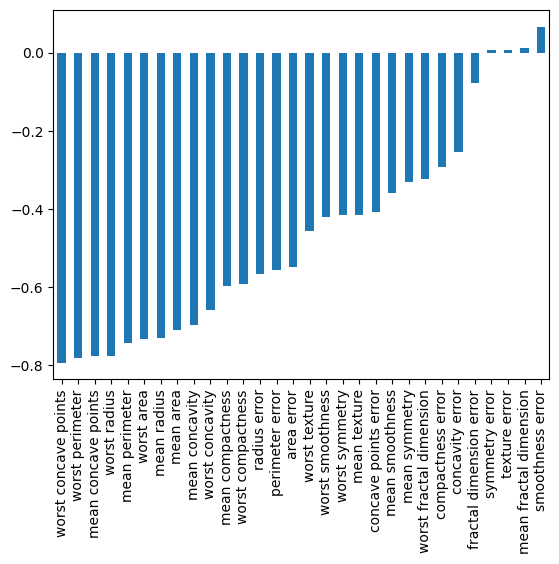

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

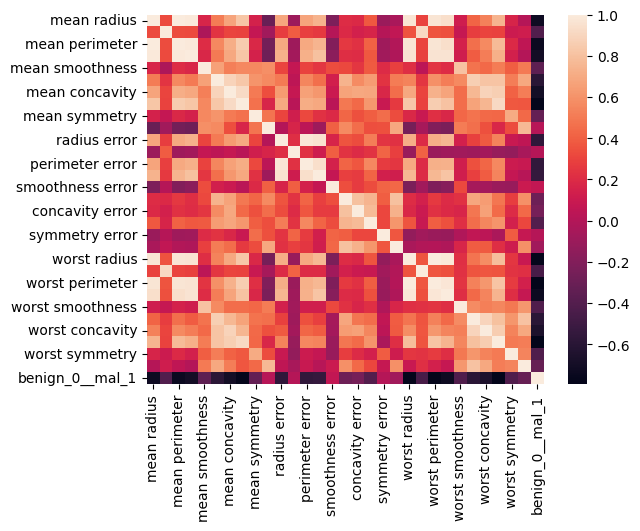

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
y = df['benign_0__mal_1'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Dense(units=30, activation='relu'))

In [23]:
model.add(Dense(units=15, activation='relu'))

In [24]:
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x=X_train, y=y_train, epochs=600,  validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 2s 36ms/step - loss: 0.6923 - val_loss: 0.6639
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6514 - val_loss: 0.6257
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6100 - val_loss: 0.5849
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5668 - val_loss: 0.5378
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5162 - val_loss: 0.4859
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4640 - val_loss: 0.4296
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4109 - val_loss: 0.3802
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3630 - val_loss: 0.3314
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3223 - val_loss: 0.2922
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2912 - val_loss: 0.2625
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0509 - val_loss: 0.1283
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0506 - val_loss: 0.1258
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0507 - val_loss: 0.1258
Epoch 86/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0514 - val_loss: 0.1249
Epoch 87/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0500 - val_loss: 0.1206
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0515 - val_loss: 0.1226
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.1200
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0510 - val_loss: 0.1278
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0507 - val_loss: 0.1160
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0538 - val_loss: 0.1378

14/14 [==============================] - 0s 7ms/step - loss: 0.0349 - val_loss: 0.1376
Epoch 165/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0371 - val_loss: 0.1418
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0393 - val_loss: 0.1578
Epoch 167/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.1308
Epoch 168/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0395 - val_loss: 0.1539
Epoch 169/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0341 - val_loss: 0.1368
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0344 - val_loss: 0.1429
Epoch 171/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0338 - val_loss: 0.1498
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.1501
Epoch 173/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0331 - val_loss: 0.1451
Epo

14/14 [==============================] - 0s 8ms/step - loss: 0.0217 - val_loss: 0.1719
Epoch 246/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0250 - val_loss: 0.1480
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0257 - val_loss: 0.1574
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0208 - val_loss: 0.1592
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.1468
Epoch 250/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0314 - val_loss: 0.2309
Epoch 251/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0263 - val_loss: 0.1441
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.1986
Epoch 253/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0258 - val_loss: 0.1568
Epoch 254/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.1618
Epo

14/14 [==============================] - 0s 8ms/step - loss: 0.0115 - val_loss: 0.1790
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.1866
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.1811
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.1971
Epoch 330/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0108 - val_loss: 0.1819
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.1767
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.2122
Epoch 333/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0108 - val_loss: 0.1732
Epoch 334/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0108 - val_loss: 0.2014
Epoch 335/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.1803
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.2283
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.2026
Epoch 409/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.2033
Epoch 410/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.2071
Epoch 411/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.1955
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.2182
Epoch 413/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.2212
Epoch 414/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.1989
Epoch 415/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.2318
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.2005
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.2803
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.2456
Epoch 490/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.2608
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.2490
Epoch 492/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.2702
Epoch 493/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.2377
Epoch 494/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.2706
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.2523
Epoch 496/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.2630
Epoch 497/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.2549
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.3139
Epoch 570/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.3184
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.3172
Epoch 572/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.3243
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.3218
Epoch 574/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 0.3003
Epoch 575/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0065 - val_loss: 0.3018
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.3205
Epoch 577/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.4271
Epoch 578/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0130 - val_loss: 0.4156
Epoc

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.692347,0.663887
1,0.651366,0.625685
2,0.609994,0.584920
3,0.566841,0.537765
4,0.516193,0.485875
...,...,...
595,0.000978,0.329526
596,0.000967,0.335711
597,0.001286,0.354908
598,0.001234,0.339778


<Axes: >

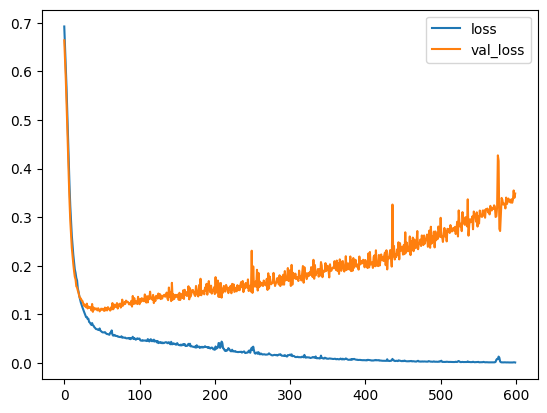

In [28]:
model_loss.plot()

In [29]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
model.fit(
    x=X_train, 
    y=y_train, 
    epochs=600, 
    validation_data=(X_test, y_test), 
    verbose=1, 
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 2s 27ms/step - loss: 0.7002 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6637 - val_loss: 0.6489
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6379 - val_loss: 0.6224
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6091 - val_loss: 0.5877
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5656 - val_loss: 0.5327
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5081 - val_loss: 0.4698
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4460 - val_loss: 0.4108
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3921 - val_loss: 0.3576
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3434 - val_loss: 0.3132
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3047 - val_loss: 0.2785
Epoch 11

<Axes: >

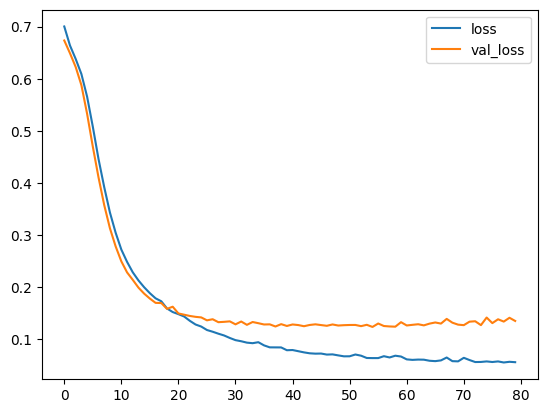

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [37]:
model.fit(
    x=X_train, 
    y=y_train, 
    epochs=600, 
    validation_data=(X_test, y_test), 
    verbose=1, 
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.7021 - val_loss: 0.6643
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6857 - val_loss: 0.6322
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6576 - val_loss: 0.6086
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6368 - val_loss: 0.5793
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6047 - val_loss: 0.5471
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5779 - val_loss: 0.5161
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5464 - val_loss: 0.4748
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5315 - val_loss: 0.4430
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4947 - val_loss: 0.4135
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4751 - val_loss: 0.3862
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.1087 - val_loss: 0.1072
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1323 - val_loss: 0.0934
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1324 - val_loss: 0.0988
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0952 - val_loss: 0.0994
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1189 - val_loss: 0.0931
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1048 - val_loss: 0.1005
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1063 - val_loss: 0.1000
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1001 - val_loss: 0.0977
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1076 - val_loss: 0.0946
Epoch 92/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1002 - val_loss: 0.0978
Epoch 93/600


<Axes: >

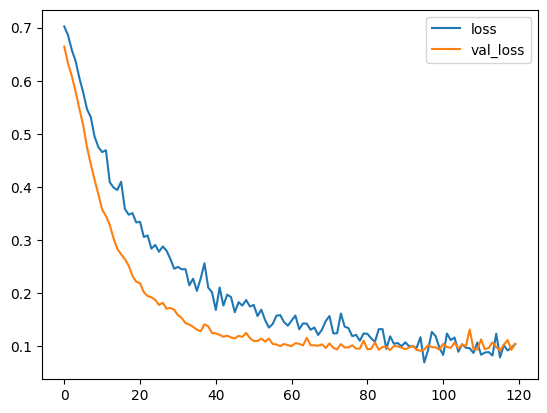

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
# predictions = model.predict_classes(X_test)
predictions = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [40]:
classes_x = np.argmax(predictions, axis=1)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



E:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(confusion_matrix(y_test, classes_x))

[[55  0]
 [88  0]]
